In [1]:
%matplotlib inline
from matplotlib import style
from matplotlib.ticker import MaxNLocator
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text, distinct
from pathlib import Path

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurements = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(bind=engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session = Session(engine)
session.query(Measurements.date).order_by(Measurements.date.desc()).first()

('2017-08-23',)

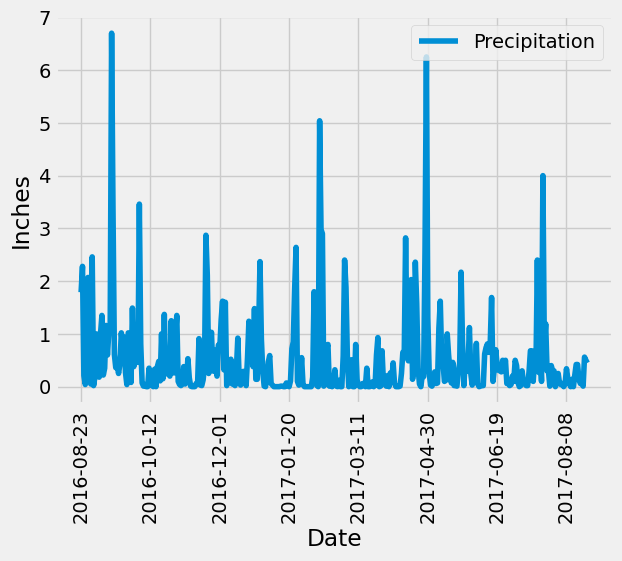

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
prevYearData = session.query(Measurements.date, func.sum(Measurements.prcp)).\
    filter(Measurements.date<='2017-08-23').\
    filter(Measurements.date>'2016-08-23').\
    group_by(Measurements.date).all()
# Calculate the date one year from the last date in data set.
year = session.query(Measurements.date).order_by(Measurements.date.desc()).first()
year_later = dt.date(2017,8,23) + dt.timedelta(days=365)
year_later

# Perform a query to retrieve the data and precipitation scores

sel = [
    Measurements.date,
    func.max(Measurements.prcp)
]
year_measurements = session.query(*sel).\
    filter(Measurements.date<='2017-08-23').filter(Measurements.date>='2016-08-23').\
    group_by(Measurements.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(year_measurements, columns = ['Date', 'Precipitation'])

# Sort the dataframe by date
df.sort_values(by=['Date'])

# Use Pandas Plotting with Matplotlib to plot the data
df.set_index('Date', inplace=True)
ax = df.plot(rot=90)
ax.set_ylabel('Inches')
ax.legend(loc="upper right")

plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
data = session.query((Measurements.prcp)).\
    filter(Measurements.date<='2017-08-23').filter(Measurements.date>='2016-08-23').all()
    
    
df = pd.DataFrame(data, columns=['prcp'])
df.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [12]:
# Design a query to calculate the total number of stations in the dataset
numStations = session.query(func.count(distinct(Measurements.station))).all()
numStations

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
mostActiveStations = session.query(Measurements.station, func.count(Measurements.station)).\
    group_by(Measurements.station).\
    order_by(func.count(Measurements.station).desc()).all()
mostActiveStations   

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
 # Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
mostActiveData =  session.query(func.min(Measurements.tobs),func.max(Measurements.tobs),func.avg(Measurements.tobs)).\
    filter(Measurements.station=='USC00519281').all()
mostActiveData

[(54.0, 85.0, 71.66378066378067)]

Text(0.5, 0, 'Temperature')

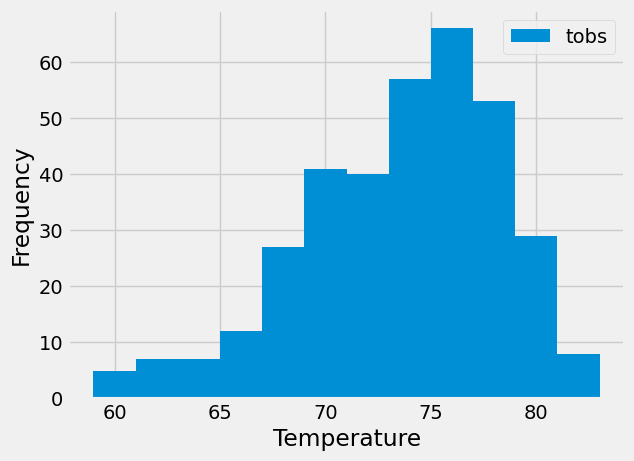

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tempData = session.query(Measurements.tobs).\
    filter(Measurements.date<='2017-08-23').\
    filter(Measurements.date>='2016-08-23').\
    filter(Measurements.station=='USC00519281')

df = pd.DataFrame(tempData, columns = ['tobs'])
ax = df.plot.hist(bins=12)
locator=MaxNLocator(prune= 'upper', nbins=7)
ax.yaxis.set_major_locator(locator)
ax.set_xlabel("Temperature")


# Close Session

In [16]:
# Close Session
session.close()